#  **Import Libraries**

In [29]:
import numpy as np
import pandas as pd
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import seaborn as sns

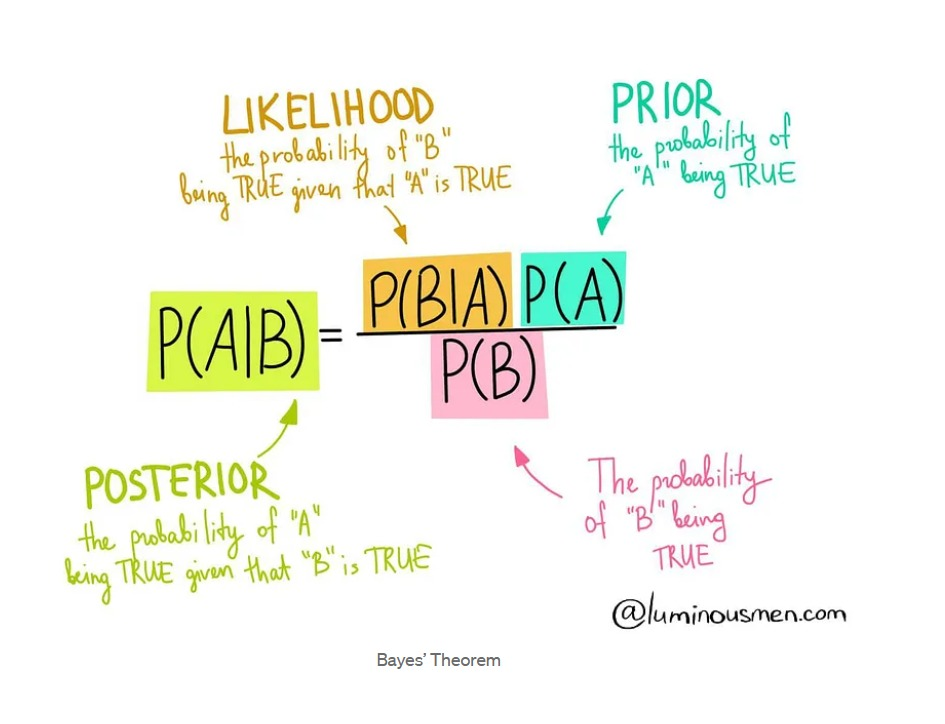

# **Naive Bayes with Gaussian Normal Distribution Implementation**

In [30]:
class NaiveBayesClassifier:
    def __init__(self):
        self.classes = None
        self.class_priors = None
        self.mean = None
        self.var = None

    def fit(self, X, y):
        self.classes = np.unique(y)
        self.class_priors = self.calc_prior(y)
        self.mean, self.var = self.calc_statistics(X, y)

    def calc_statistics(self, X, y):
        n_features = X.shape[1]
        mean = np.zeros((len(self.classes), n_features))
        var = np.zeros((len(self.classes), n_features))

        for idx, c in enumerate(self.classes):
            X_c = X[y == c]
            mean[idx, :] = X_c.mean(axis=0)
            var[idx, :] = X_c.var(axis=0)

        return mean, var

    def calc_prior(self, y):
        class_counts = np.zeros(len(self.classes))
        for c in self.classes:
            class_counts[c] = np.sum(y == c)
        return class_counts / len(y)

    def gaussian_pdf(self, X, mean, var):
        eps = 1e-6  # to avoid division by zero
        coeff = 1.0 / np.sqrt(2.0 * np.pi * var + eps)
        exponent = np.exp(-0.5 * ((X - mean) ** 2) / (var + eps))
        return coeff * exponent

    def predict(self, X):
        posteriors = []
        for idx, c in enumerate(self.classes):
            prior = np.log(self.class_priors[idx])
            likelihood = np.sum(np.log(self.gaussian_pdf(X, self.mean[idx, :], self.var[idx, :])), axis=1)
            posterior = prior + likelihood
            posteriors.append(posterior)
        return np.argmax(posteriors, axis=0)

# **Load IRIS Data From SikitLearn**

In [31]:
# Load Iris dataset
iris = load_iris()
# Convert iris data to a NumPy array
iris_array = np.asarray(iris.data)
df_iris = pd.DataFrame(iris_array)
df_iris

,0,1,2,3
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2
...,...,...,...,...
145,6.7,3.0,5.2,2.3
146,6.3,2.5,5.0,1.9
147,6.5,3.0,5.2,2.0
148,6.2,3.4,5.4,2.3


# **Correlation Matrix**

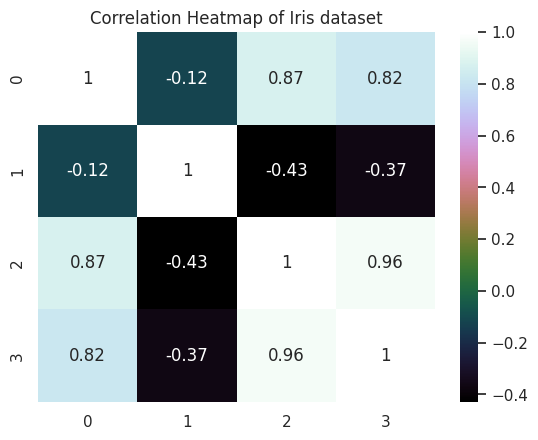

In [32]:
cmap = sns.color_palette("cubehelix", as_cmap=True)
sns.heatmap(df_iris.corr(), annot=True, cmap=cmap)
plt.title('Correlation Heatmap of Iris dataset')
plt.show()

# **Split Data to Features and Targets**

In [33]:
X = iris.data
y = iris.target

# **Split Data into Training and Testing**

In [34]:
# Split dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# **Classes of IRIS**

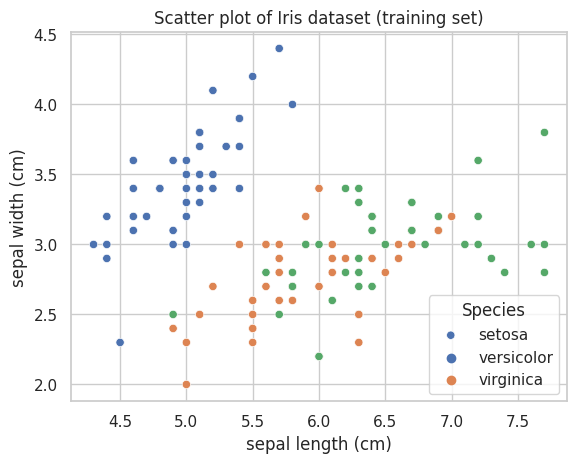

In [39]:
# Set the style for seaborn
sns.set(style="whitegrid")

# Select two features for visualization, for example, sepal length (feature 0) and sepal width (feature 1)
feature1_index = 0
feature2_index = 1

# Plot the data points
sns.scatterplot(x=X_train[:, feature1_index], y=X_train[:, feature2_index], hue=y_train, palette="deep")
plt.xlabel(iris.feature_names[feature1_index])
plt.ylabel(iris.feature_names[feature2_index])
plt.title('Scatter plot of Iris dataset (training set)')
plt.legend(title='Species', labels=iris.target_names)
plt.show()


# **Model Prediction and Evaluation**

In [36]:
# Train Naive Bayes classifier
nb_classifier = NaiveBayesClassifier()
nb_classifier.fit(X_train, y_train)

# Predict
predictions = nb_classifier.predict(X_test)

# Calculate accuracy
accuracy = np.mean(predictions == y_test)
print("Accuracy:", accuracy)

Accuracy: 1.0
